<a href="https://colab.research.google.com/github/Vimukthi-Nuwan/Machine_Learning/blob/main/Classification/random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Random Forest Classification model on the Training set

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting a new result

In [6]:
classifier.predict(sc.transform([[30, 87000]]))

array([0])

## Predicting the Test set results

In [8]:
y_predict = classifier.predict(X_test)
np.concatenate((y_predict.reshape(len(y_predict), 1), y_test.reshape(len(y_test), 1)), 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
accu_scor = accuracy_score(y_test, y_predict)
print(f'Confusion Matrix:\n{cm}\n\nAccoracy Score: {accu_scor}')

Confusion Matrix:
[[54  4]
 [ 3 19]]

Accoracy Score: 0.9125


## Visualising the Training set results

<ipython-input-11-3116764b8278>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


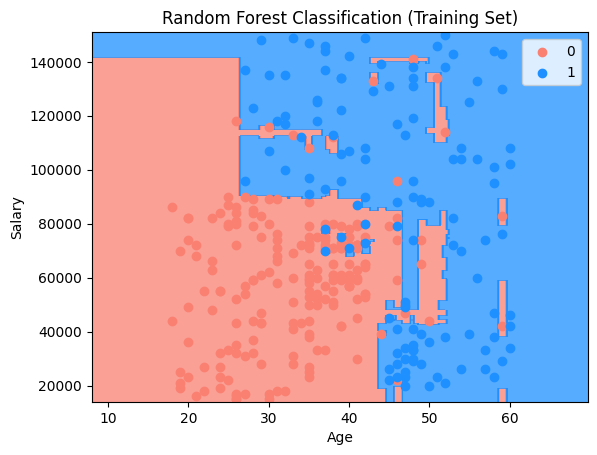

In [11]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(
    np.arange(start = (X_set[:,0].min() - 10), stop = (X_set[:,0].max() + 10), step = 0.25),
    np.arange(start = (X_set[:,1].min() - 1000), stop = (X_set[:,1].max() + 1000), step = 0.25)
)

Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(['salmon', 'dodgerblue']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(
      X_set[y_set == j, 0],
      X_set[y_set == j, 1],
      c = ListedColormap(['salmon', 'dodgerblue'])(i),
      label = j
  )

plt.title("Random Forest Classification (Training Set)")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


## Visualising the Test set results

<ipython-input-10-668f5e05ab73>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


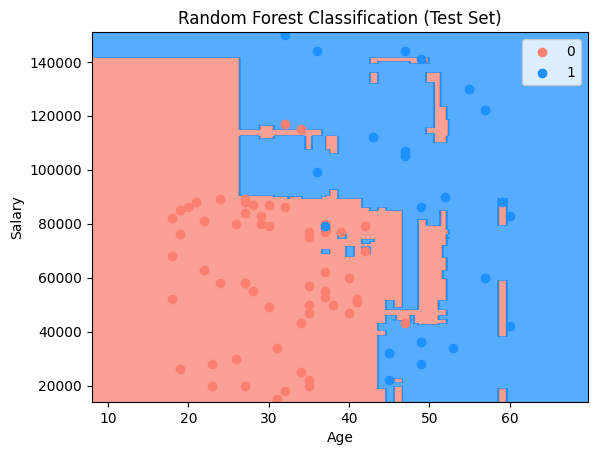

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(
    np.arange(start = (X_set[:,0].min() - 10), stop = (X_set[:,0].max() + 10), step = 0.25),
    np.arange(start = (X_set[:,1].min() - 1000), stop = (X_set[:,1].max() + 1000), step = 0.25)
)

Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(['salmon', 'dodgerblue']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(
      X_set[y_set == j, 0],
      X_set[y_set == j, 1],
      c = ListedColormap(['salmon', 'dodgerblue'])(i),
      label = j
  )

plt.title("Random Forest Classification (Test Set)")
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()
